In [21]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
import soundfile as sf

In [4]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 5

In [44]:
# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("sound.wav3",sr,recording)

recording...............


In [7]:
# Look at the discrete number array we got from the audio
x, sr = librosa.load('sound.wav')
print("recording shape", x.shape)
print("sampling rate", sr)

recording shape (110250,)
sampling rate 22050


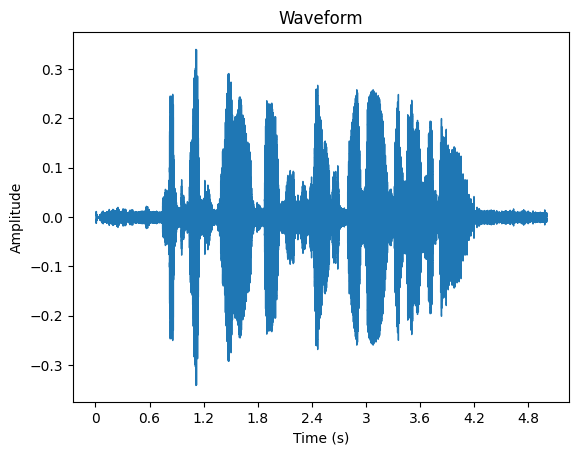

In [7]:
librosa.display.waveshow(x, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

In [47]:
# Play the audio
ipd.Audio(x, rate=sr) # load a NumPy array

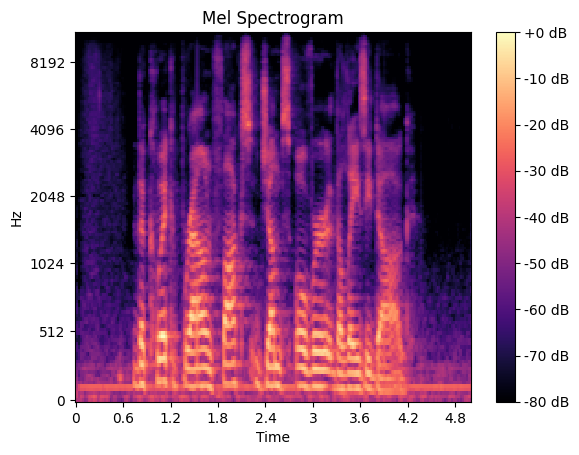

In [51]:
# Load audio file
y, sr = librosa.load('sound.wav')

# Compute spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibels (log scale)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

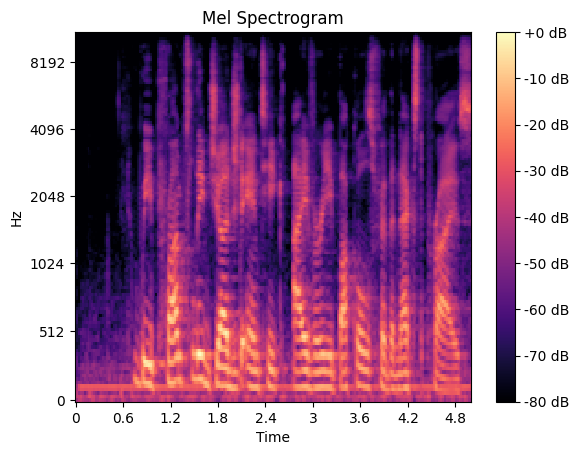

In [50]:
# Load audio file
y, sr = librosa.load('sound.wav2')

# Compute spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibels (log scale)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

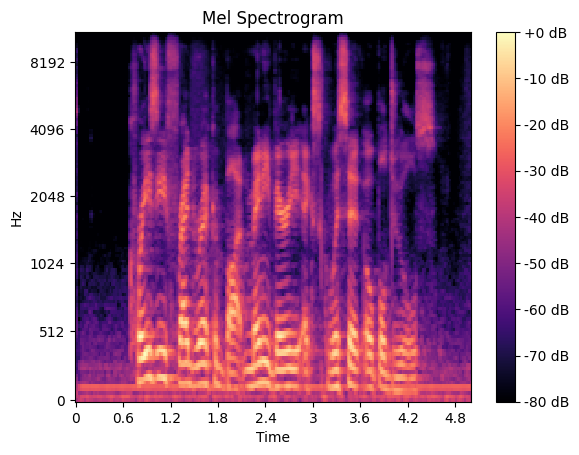

In [52]:
# Load audio file
y, sr = librosa.load('sound.wav3')

# Compute spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibels (log scale)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

In [41]:
L = x
R = x
stereoSignal = np.asarray([L, R])
sf.write('stereo_output.wav', stereoSignal.T, sr)

In [42]:
average_samples = 23
delayed_column = np.concatenate([np.zeros(average_samples), R[:-average_samples]])
avghead = np.asarray([L, delayed_column])
sf.write('stereo_output_ag.wav', avghead.T, sr)

In [43]:
#1 ms delat to right channel
delay1ms = int(.001 *sr )
delayed_right_channel = np.concatenate([np.zeros(delay1ms), R[:-delay1ms]])
vector1ms = np.asarray([L, delayed_right_channel])
sf.write('stereo_output_avghead1.wav', vector1ms.T, sr)
print (vector1ms)

[[ 0.00529093  0.00821752  0.00747758 ... -0.00583162 -0.00602454
  -0.00613441]
 [ 0.          0.          0.         ... -0.0022952  -0.00244178
  -0.00269317]]


In [44]:
#10 ms delat to right channel
delay10ms = int(.01 *sr) 
delayed_right_channel = np.concatenate([np.zeros(delay10ms), R[:-delay10ms]])
vector10ms = np.asarray([L, delayed_right_channel])
sf.write('stereo_output_avghead10.wav', vector10ms.T, sr)
print (vector10ms)

[[ 0.00529093  0.00821752  0.00747758 ... -0.00583162 -0.00602454
  -0.00613441]
 [ 0.          0.          0.         ...  0.00490157  0.00455641
   0.00405444]]


In [45]:
#100 ms delay to right channel
delay100ms = int(.1 *sr)
delayed_right_channel = np.concatenate([np.zeros(delay100ms), R[:-delay100ms]])
vector100ms = np.asarray([L, delayed_right_channel])
sf.write('stereo_output_avghead100.wav', vector100ms.T, sr)
print (vector100ms)


[[ 0.00529093  0.00821752  0.00747758 ... -0.00583162 -0.00602454
  -0.00613441]
 [ 0.          0.          0.         ... -0.00446883 -0.0047676
  -0.00497494]]


In [37]:
L = x 
R = x * 0.7
attenuateonefive= np.asarray([L, R])
delayed_column_attenuate_onefive= delayed_column.T * .7

sf.write('stereo_output_attenuateonefive.wav', attenuateonefive.T, sr)

avg_head_attenuate_onefive= np.asarray([L, delayed_column_attenuate_onefive])
sf.write('stereo_output_delayed_attenuateonefive.wav', avg_head_attenuate_onefive.T, sr)



In [38]:
L = x 
R = x * 0.5
delayed_column_attenuate_three = delayed_column * .5

attenuatethree= np.asarray([L, R])
sf.write('stereo_output_attenuatethree.wav', attenuatethree.T, sr)

avg_head_attenuate_three= np.asarray([L, delayed_column_attenuate_three])
sf.write('stereo_output_delayed_attenuatethree.wav', avg_head_attenuate_three.T , sr)


In [40]:
L = x 
R = x * 0.25
delayed_column_attenuate_six = delayed_column * .25

attenuatesix= np.asarray([L, R])
sf.write('stereo_output_attenuatesix.wav', attenuatesix.T, sr)

avg_head_attenuate_six= np.asarray([L, delayed_column_attenuate_six])
sf.write('stereo_output_delayed_attenuatesixe.wav', avg_head_attenuate_six.T, sr)